<a href="https://colab.research.google.com/github/vaibhavip951/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle/

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:21<00:00, 23.7MB/s]
100% 428M/428M [00:21<00:00, 20.8MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!mkdir input

In [ ]:
!mv /content/tess toronto emotional speech set data - /.kaggle/

mv: target '/.kaggle/' is not a directory


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

## **Loading Dataset**

In [ ]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
  if len(paths) == 2800:
    break
  print('Dataset is loaded')



Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded
Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_mouse_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_learn_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_sell_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_have_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_far_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df['label'].value_counts()

,count
label,
sad,400
angry,400
fear,400
neutral,400
ps,400
disgust,400
happy,400


In [ ]:
df['label_count']= df['label'].value_counts()

In [ ]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,happy
2796,/content/tess toronto emotional speech set dat...,happy
2797,/content/tess toronto emotional speech set dat...,happy
2798,/content/tess toronto emotional speech set dat...,happy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

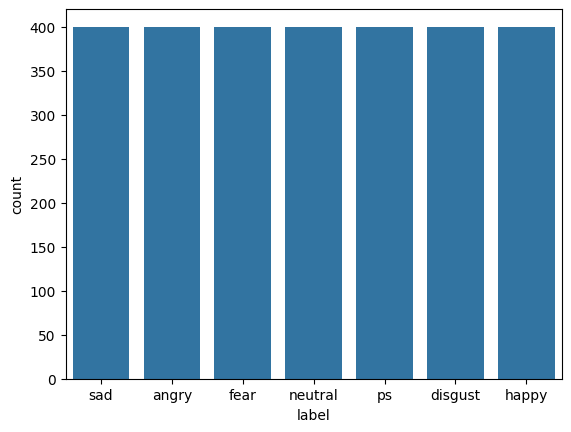

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
df.drop('label_count', axis=1, inplace=True)

In [ ]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...   sad
1  /content/tess toronto emotional speech set dat...   sad
2  /content/tess toronto emotional speech set dat...   sad
3  /content/tess toronto emotional speech set dat...   sad
4  /content/tess toronto emotional speech set dat...   sad
['sad' 'angry' 'fear' 'neutral' 'ps' 'disgust' 'happy']


In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_mouse_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_learn_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_sell_sad.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_fit_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_thumb_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_lease_happy.wav'],
      dtype=object)

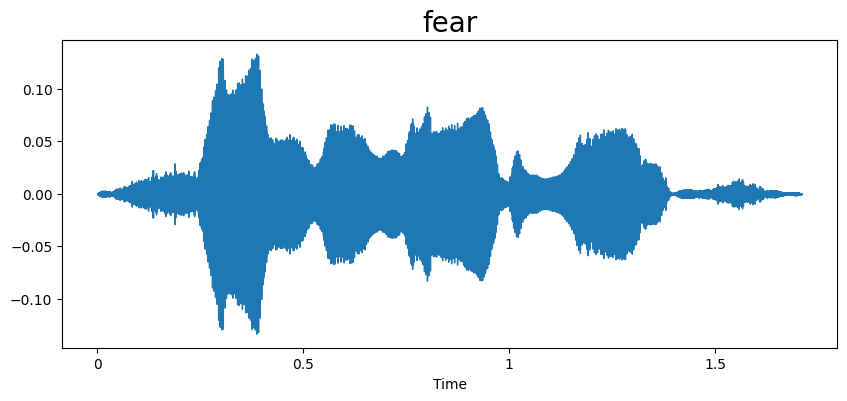

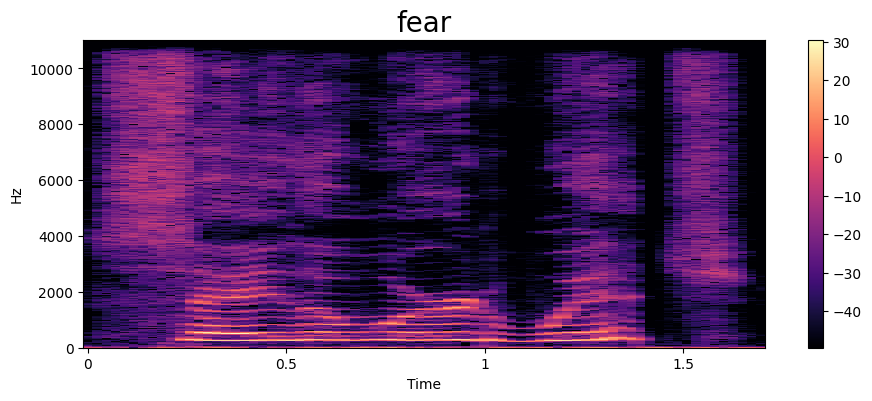

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

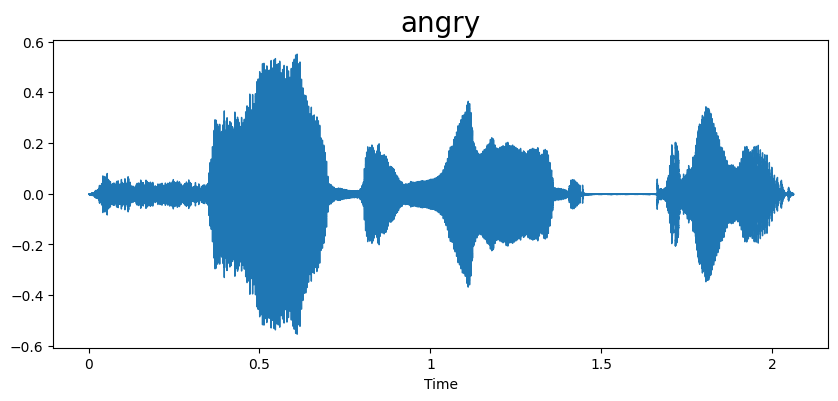

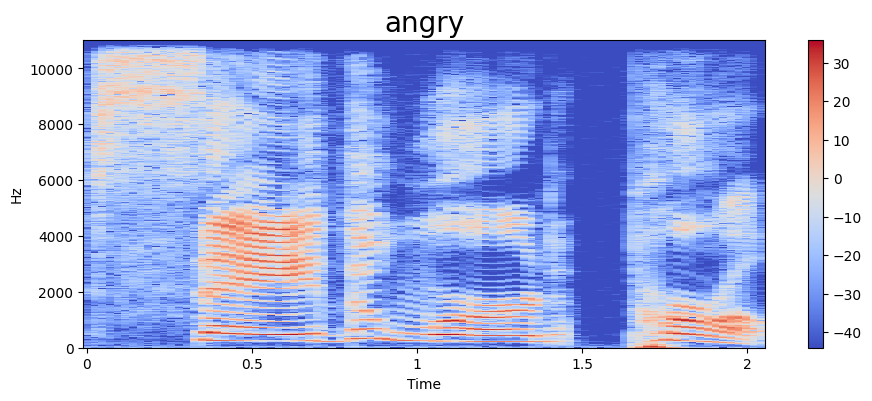

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

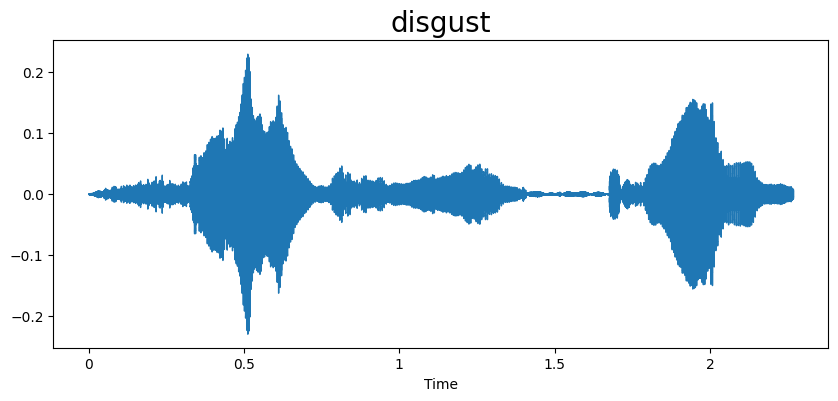

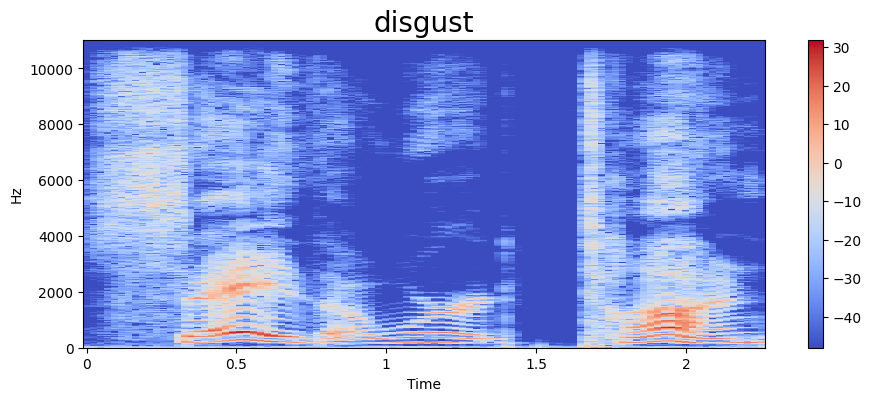

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

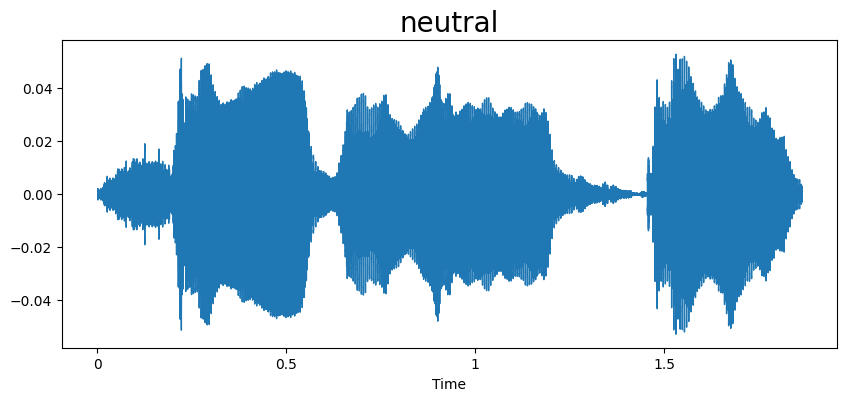

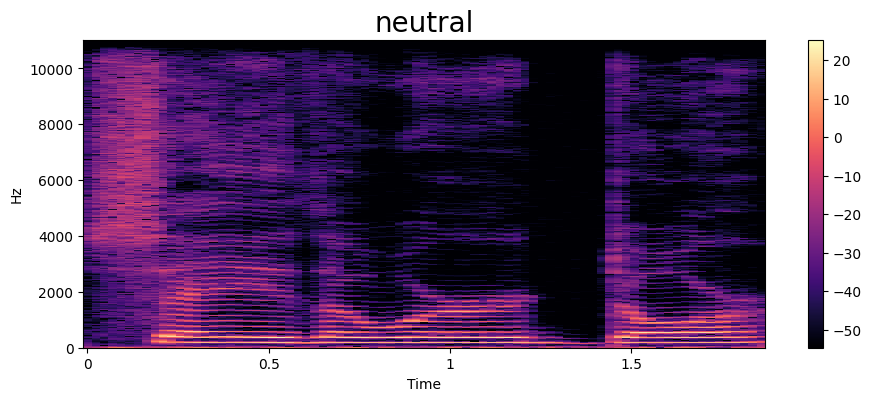

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

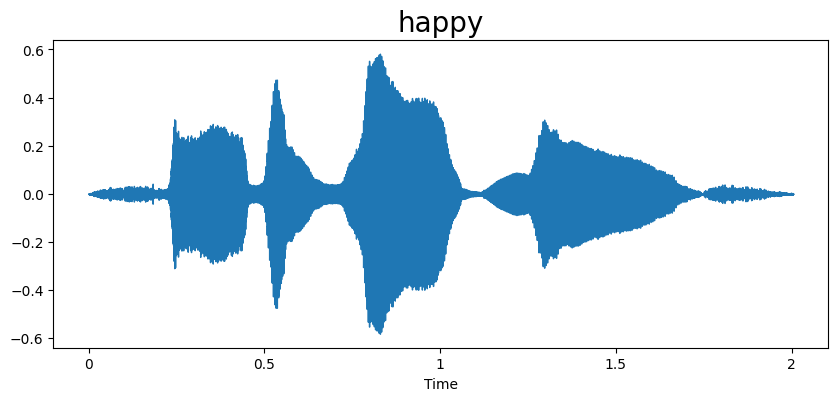

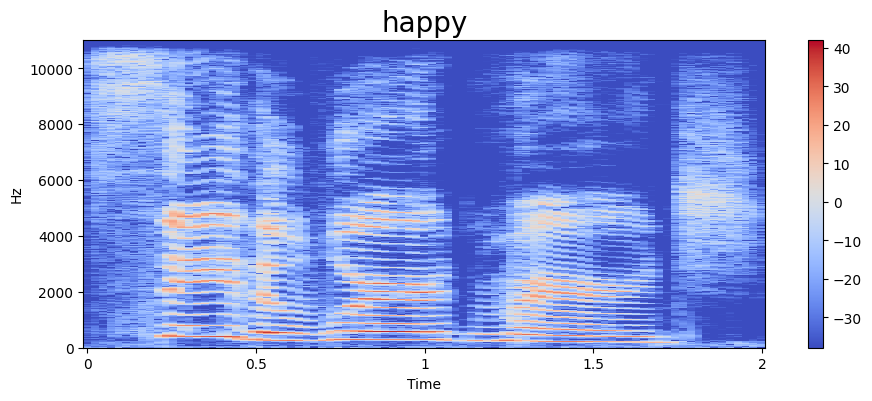

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## **Feature Extraction**

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.2652594e+02,  7.1473503e+01,  3.1207537e+01,  2.4749554e+01,
       -1.8988413e-01,  2.0541044e+01, -2.4808795e+00, -1.0872850e+01,
        1.5929666e+00, -2.5287604e+00, -3.5726860e+00, -1.8342959e+00,
       -6.0480599e+00,  7.7964787e+00, -8.7452087e+00,  2.8605275e-02,
       -2.3814344e+00, -4.7557914e-01, -4.4002914e+00, -4.4336743e+00,
       -7.1990614e+00, -7.2645783e+00, -5.0652275e+00,  4.5574644e-01,
       -5.1450400e+00,  7.3411317e+00,  2.6805297e-01, -2.4198864e+00,
       -4.8143405e-01, -3.5915005e+00, -2.1918449e+00,  8.8301497e+00,
        5.1136246e+00,  1.1368802e+01,  5.7744155e+00,  5.9645329e+00,
       -5.4902589e-01,  2.2092121e+00,  2.5256982e+00,  8.8038864e+00],
      dtype=float32)

In [ ]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

,speech
0,"[-426.52594, 71.4735, 31.207537, 24.749554, -0..."
1,"[-415.2604, 111.27247, 25.12363, 39.552914, 6...."
2,"[-359.31107, 83.19714, 32.520493, 28.11811, -6..."
3,"[-380.16876, 94.54875, 8.321518, 23.716715, -5..."
4,"[-393.151, 92.27245, 15.56543, 29.29046, -4.87..."
...,...
2795,"[-472.85248, 108.3224, 24.373451, -1.591392, -..."
2796,"[-477.3077, 111.65921, 38.825253, 1.8179787, 0..."
2797,"[-440.46292, 84.652855, 11.523633, -15.052702,..."
2798,"[-457.0363, 99.61442, 12.625009, -14.057566, -..."


In [ ]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Create the LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['aaccuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2529 - loss: 1.8606 - val_accuracy: 0.6893 - val_loss: 0.9973
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5656 - loss: 1.1288 - val_accuracy: 0.8321 - val_loss: 0.5568
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7144 - loss: 0.7563 - val_accuracy: 0.8536 - val_loss: 0.3668
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8249 - loss: 0.5179 - val_accuracy: 0.9179 - val_loss: 0.2495
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8624 - loss: 0.4515 - val_accuracy: 0.9464 - val_loss: 0.1477
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9110 - loss: 0.3281 - val_accuracy: 0.9393 - val_loss: 0.1944
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9370 - loss: 0.2251 - val_accuracy: 0.9464 - val_loss: 0.1822
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9437 - loss: 0.2192 - val_accuracy: 0.9161 - val_loss

## **Plot the Result**

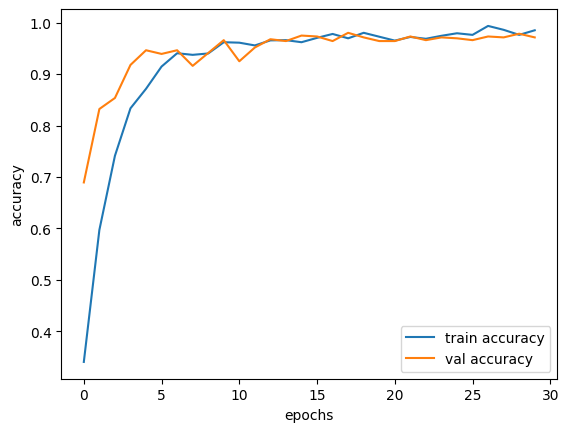

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

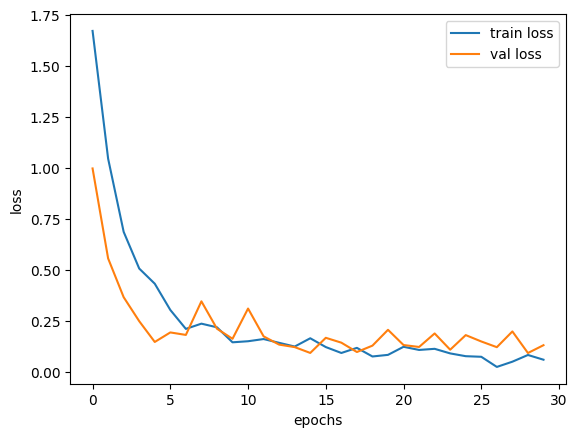

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[83  1  1  1  0  0  0]
 [ 2 74  0  1  0  2  0]
 [ 0  0 89  0  0  0  0]
 [ 2  0  0 68  0  0  0]
 [ 0  0  0  0 79  0  0]
 [ 0  2  0  4  0 71  0]
 [ 0  0  0  0  0  0 80]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.95      0.97      0.96        86
     disgust       0.96      0.94      0.95        79
        fear       0.99      1.00      0.99        89
       happy       0.92      0.97      0.94        70
     neutral       1.00      1.00      1.00        79
          ps       0.97      0.92      0.95        77
         sad       1.00      1.00      1.00        80

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



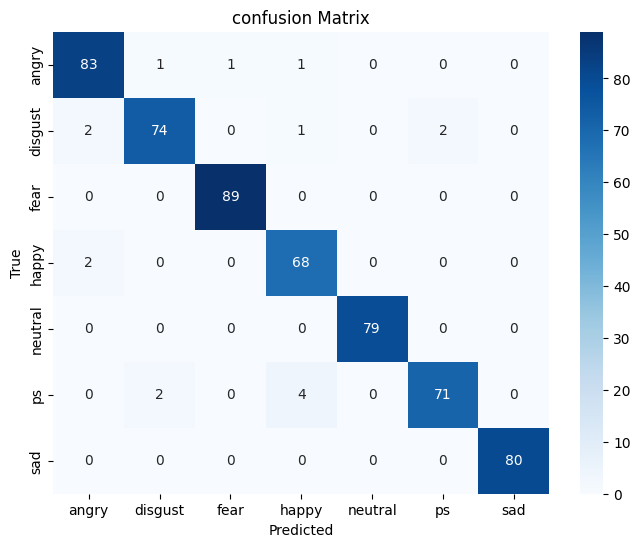

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('confusion Matrix')
plt.show()